# Data Mining - Project
## Group Members
|Name|StudentID|
|:-----------:|:--------:|
|Fabio Lopes|20200597|
|Filipe Costa|20201041|
|Jorge Pereira|20201085|


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('donors.csv')

C:\Users\Jorge\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,...,12.146341,4693,1,L,4,F,X,X,X,A


In [4]:
numericDf = df._get_numeric_data()
categoricalDF = df.drop(numericDf.columns, axis = 1)
print('Numerical columns: ' + str(len(numericDf.columns)) +  '\nCategorical columns: ' + str(len(categoricalDF.columns)))

Numerical columns: 351
Categorical columns: 125


In [5]:
dfState = pd.DataFrame(df.groupby('STATE')['STATE'].agg({'count'})).sort_values(by=['count'], ascending=False).reset_index()
dfState.head(10)

,STATE,count
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [6]:
#pd.DataFrame(df.groupby('TCODE')['TCODE'].agg({'count'})).sort_values(by=['count'], ascending=False).reset_index()
#pd.DataFrame(df.groupby(['STATE', df.DOMAIN.str[:1]]).size())

In [7]:
dfDomain = df.groupby(df.DOMAIN.str[:1], as_index=False)['DOMAIN'].agg(['count']).sort_values(by=['count'], ascending=False).reset_index()
dfDomain

#U=Urban
#C=City
#S=Suburban
#T=Town
#R=Rural

,DOMAIN,count
0,S,21924
1,R,19790
2,C,19689
3,T,19527
4,U,12166
5,,2316


In [8]:
df.groupby(df.DOMAIN, as_index=False)['DOMAIN'].agg(['count']).sort_values(by=['count'], ascending=False)

#See exception in 2nd byte - value 3 is different in Urban communities

,count
DOMAIN,
R2,13623
T2,12369
S1,11503
S2,8530
C2,8264
C1,6145
C3,5280
T1,4982
R3,4809


In [9]:
df.groupby(df['WEALTH2'], as_index=False)['WEALTH2'].agg(['count']).sort_values(by=['count'], ascending=False).reset_index()

,WEALTH2,count
0,9.0,6523
1,8.0,5975
2,7.0,5684
3,6.0,5497
4,5.0,5351
5,4.0,5074
6,3.0,5046
7,2.0,4971
8,1.0,4191
9,0.0,3277


In [10]:
def corHeatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()

In [11]:
selectedColumns = ['POP901', 'WEALTH2', 'AGE901', 'MARR1', 'MARR2', 'MARR3','IC3', 'IC5' , 'HHAS1', 'AC1', 'AC2', 'POP90C4', 'POP90C5', 'HHAGE1', 'HHAGE2', 'MALEVET', 'VIETVETS', 'WWIIVETS']

#POP901          Number of Persons
#WEALTH2         Wealth Rating
#AGE901          Median Age of Population
#MARR1           Percent Married
#MARR2           Percent Separated or Divorced
#MARR3           Percent Widowed
#IC3             Average Household Income in hundreds
#IC5             Per Capita Income
#HHAS1           Percent Households on Social Security
#AC1             Percent Adults Age 55-59
#AC2             Percent Adults Age 60-64
#POP90C4         Percent Male
#POP90C5         Percent Female
#HHAGE1          Percent Households w/ Person 65+
#HHAGE2          Percent Households w/ Person 65+ Living Alone
#MALEVET         % Males Veterans
#VIETVETS        % Vietnam Vets
#WWIIVETS        % WWII Vets

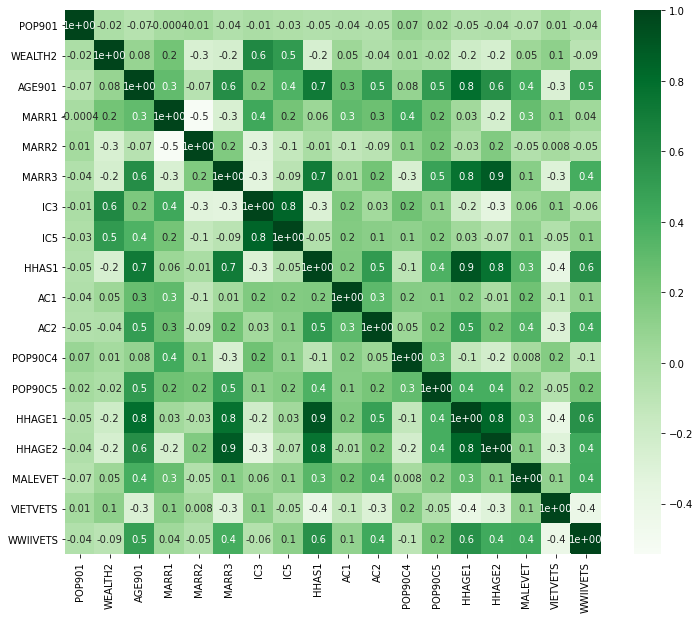

In [12]:
dfCorrelation = df[selectedColumns]

corPearson = dfCorrelation.corr()
corHeatmap(corPearson)

In [13]:
filterDf = df[df['MDMAUD'] != 'XXXX']
filterDf

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
107,107,2006-01-01,MBC,0,FL,32073,,,1958-12-01,0,...,37.777778,12105,1,L,1,G,C,1,C,B
371,371,2008-01-01,LIS,1,TX,77511,,,1935-06-01,0,...,68.111111,7000,1,L,1,G,D,1,C,A
477,477,2006-01-01,ASC,1,GA,30349,,,1950-01-01,0,...,20.000000,14505,1,L,1,G,L,1,C,A
535,535,2010-01-01,L01,3,MO,64633,,,2010-01-01,0,...,42.533333,12569,1,L,2,G,C,2,C,D
618,618,2006-01-01,BHG,0,FL,33777,,,NaN,0,...,71.750000,185144,0,L,1,G,D,2,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94040,94040,2011-01-01,WIG,0,CA,92115,,,1958-03-01,0,...,70.000000,7402,0,L,1,G,D,1,C,A
94879,94879,2006-01-01,BRE,1,SC,29205,,,1962-11-01,0,...,29.470588,5907,1,L,3,G,C,1,C,B
95348,95348,2006-01-01,MCC,0,CA,92545,,,1956-01-01,0,...,95.454545,185087,1,L,1,G,D,2,M,A
95396,95396,2011-01-01,PBL,0,CA,94305,,,1934-01-01,0,...,72.857143,12322,1,L,3,G,L,2,C,A


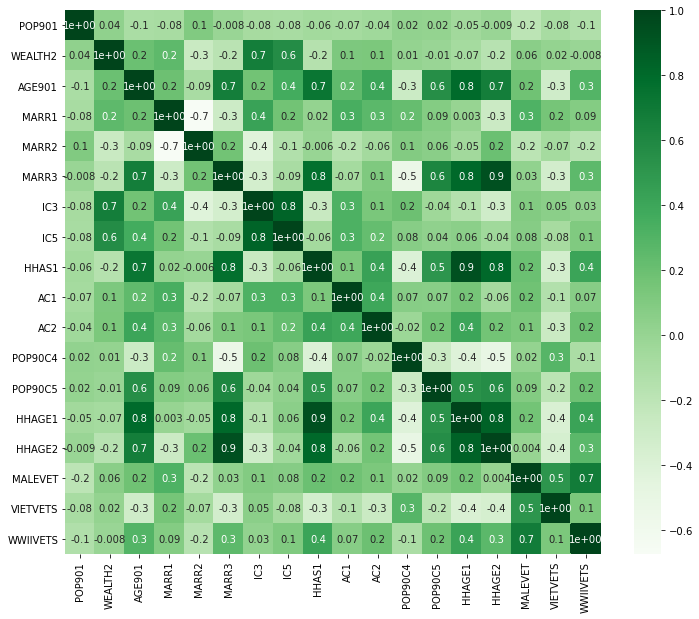

In [14]:
filterDfCorrelation = filterDf[selectedColumns]

corPearson = filterDfCorrelation.corr()
corHeatmap(corPearson)

# Testes para estudo dos dados

In [15]:
#Lapsed Donors
df[df['MDMAUD'].str[0] == 'L']

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
477,477,2006-01-01,ASC,1,GA,30349,,,1950-01-01,0,...,20.000000,14505,1,L,1,G,L,1,C,A
2242,2242,2015-01-01,TVH,0,CA,90069,,,1954-01-01,0,...,200.000000,13048,0,L,3,G,L,1,C,A
6303,6303,2009-01-01,SSS,1,CA,92264,,,NaN,0,...,72.222222,3305,1,L,1,G,L,2,C,A
9498,9498,2008-01-01,,0,MI,48126,,,1931-04-01,0,...,55.081081,185088,0,L,1,G,L,1,C,A
11179,11179,2011-01-01,TWM,1,CA,95051,,,1950-05-01,0,...,110.000000,14464,0,L,1,G,L,1,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90843,90843,2012-01-01,LHJ,1,IL,60045,,,1964-08-01,0,...,85.400000,11877,0,L,1,G,L,1,C,A
90856,90856,2014-01-01,AGS,0,CA,95122,,,NaN,0,...,59.285714,12319,1,L,1,G,L,1,C,A
91680,91680,2015-01-01,CHT,1,CA,94121,,,1957-01-01,0,...,26.875000,12090,0,L,3,F,L,2,C,A
93947,93947,2007-01-01,ASC,28,TX,77098-,,,1942-04-01,0,...,75.800000,5719,0,L,1,G,L,1,C,A


In [16]:
#Different types of donors
dfMDMAUD = df.groupby(['MDMAUD'], as_index=False)['MDMAUD'].agg(['count'])
dfMDMAUD

,count
MDMAUD,
C1CM,65
C1LM,8
C1MM,1
C2CM,24
C2LM,3
C2MM,3
C5CM,3
C5MM,1
C5TM,1


In [17]:
#Different types of lapsed donors
dfMDMAUD_L = df[df['MDMAUD'].str[0] == 'L'].groupby(['MDMAUD'], as_index=False)['MDMAUD'].agg(['count'])
dfMDMAUD_L

,count
MDMAUD,
L1CM,44
L1LM,8
L1MM,1
L2CM,15
L2LM,1
L2TM,1


In [18]:
#Count of the different types of donors (1st byte)
df.groupby(df.MDMAUD.str[:1], as_index=False)['MDMAUD'].agg(['count'])

,count
MDMAUD,
C,109
D,65
I,50
L,70
X,95118


In [19]:
#Count on the frequency of giving (2nd byte)
df.groupby(df.MDMAUD.str[2:3], as_index=False)['MDMAUD'].agg(['count'])

,count
MDMAUD,
C,249
L,23
M,17
T,5
X,95118


In [20]:
#% Males active in the Military
df['MALEMILI']

0         0
1         0
2         0
3         0
4         1
         ..
95407    14
95408     0
95409     0
95410     0
95411     1
Name: MALEMILI, Length: 95412, dtype: int64

In [21]:
#4th byte: Blank/meaningless/filler - 'X' indicates that the donor is not a major donor.
df.groupby(df.MDMAUD.str[3:4], as_index=False)['MDMAUD'].agg(['count'])

,count
MDMAUD,
M,294
X,95118
